In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv("sample_data/mnist_train_small.csv",header=None)
x=df.iloc[:,1:].values
y=df[0].values
x,y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([6, 5, 7, ..., 2, 9, 5]))

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x,y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
test=pd.read_csv("sample_data/mnist_test.csv",header=None)
x_test=test.iloc[:,1:].values
y_test=test[0].values
y_pred=model.predict(x_test)
np.mean(y_test==y_pred)

np.float64(0.9122)

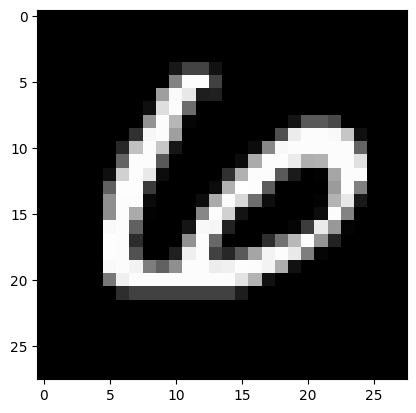

In [ ]:
plt.imshow(x[0].reshape(28,28),cmap='grey')

In [ ]:
model.coef_.shape

(10, 784)

In [ ]:
model.intercept_

array([-9.97786833e-05,  6.61810743e-05,  4.82875187e-05, -8.19830154e-05,
        1.78561991e-05,  4.82773733e-04, -5.37960360e-05,  1.23996777e-04,
       -4.46002211e-04, -5.75353571e-05])

In [ ]:
model.predict_proba(x_test)

np.argmax(model.predict_proba(x_test),axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
model.predict_proba(x_test)

array([[6.32080863e-07, 2.73709775e-15, 4.98654825e-07, ...,
        9.99840313e-01, 6.14505339e-06, 4.57461139e-05],
       [8.41789353e-07, 2.95302150e-10, 9.99926344e-01, ...,
        1.96794664e-26, 7.22086899e-08, 9.54561386e-21],
       [1.15548121e-09, 9.97578362e-01, 1.08758381e-03, ...,
        1.54398864e-04, 8.66689038e-04, 8.37514678e-06],
       ...,
       [9.64230989e-13, 3.41255130e-13, 1.04520081e-06, ...,
        6.91176272e-05, 4.58843919e-03, 4.66274043e-03],
       [1.14278226e-10, 8.30107353e-11, 8.44703216e-11, ...,
        1.64870522e-10, 3.12244373e-04, 3.42078772e-09],
       [3.46183730e-08, 6.61523221e-21, 1.24877503e-06, ...,
        7.76937427e-15, 1.29500807e-11, 2.15846352e-15]])

In [ ]:
g0=model.intercept_[0]+np.sum(model.coef_[0,:]*x_test[0])
g=[]
for i in range(0,10):
  g.append(model.intercept_[i]+np.sum(model.coef_[i,:]*x_test[0]))
g=np.array(g)
g
np.exp(g)/np.sum(np.exp(g)) #softmax function
g

array([  1.7901286 , -17.46750115,   1.55302539,   6.89220164,
        -5.81290351,   3.26935173, -16.42500749,  16.06421741,
         4.06451398,   6.07197339])

In [ ]:
np.sum(model.predict_proba(x_test),axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
g=x_test@model.coef_.T+model.intercept_
np.exp(g)/np.sum(np.exp(g),axis=1).reshape(-1,1)

array([[6.32080863e-07, 2.73709775e-15, 4.98654825e-07, ...,
        9.99840313e-01, 6.14505339e-06, 4.57461139e-05],
       [8.41789353e-07, 2.95302150e-10, 9.99926344e-01, ...,
        1.96794664e-26, 7.22086899e-08, 9.54561386e-21],
       [1.15548121e-09, 9.97578362e-01, 1.08758381e-03, ...,
        1.54398864e-04, 8.66689038e-04, 8.37514678e-06],
       ...,
       [9.64230989e-13, 3.41255130e-13, 1.04520081e-06, ...,
        6.91176272e-05, 4.58843919e-03, 4.66274043e-03],
       [1.14278226e-10, 8.30107353e-11, 8.44703216e-11, ...,
        1.64870522e-10, 3.12244373e-04, 3.42078772e-09],
       [3.46183730e-08, 6.61523221e-21, 1.24877503e-06, ...,
        7.76937427e-15, 1.29500807e-11, 2.15846352e-15]])

In [ ]:
df=pd.read_csv("mnist01.csv")
x=df.iloc[:,1:].values
y=df["label"].values
y=y.reshape(-1,1)
x.shape,y.shape

((12665, 785), (12665, 1))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
def g(thetas,x):
  return x@thetas

def sigmoid(x):
  return 1/(1+np.exp(-x))

def probability(thetas,x):
  return sigmoid(g(thetas,x))

def Loss(thetas, x, y):
  prob=probability(thetas,x)
  return np.mean(-y*np.log(prob+1e-7)-(1-y)*np.log(1-prob+1e-7))

In [ ]:
def gradient_descent(x,y,thetas,learning_rate=0.001,iterations=50):
    for it in range(iterations):
        if it%(iterations//10)==0:
            print(it,': ',Loss(thetas,x,y))

        prob=probability(thetas,x)
        grads=x.T@(prob-y)
        #print(x.T.shape, (y-prob).shape)
        thetas-=grads*learning_rate
    return thetas

thetas=np.ones([785,1])
thetas=gradient_descent(x_train,y_train,thetas)

0 :  7.514990457395098


<ipython-input-40-f2f2cb02a692>:5: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


5 :  0.11453828275454493
10 :  0.09703936316704578
15 :  0.07794963270795578
20 :  0.07317720009318326
25 :  0.06999557835000163
30 :  0.06045071312045661
35 :  0.0556782805056841
40 :  0.0556782805056841
45 :  0.05408746963409328


In [ ]:
y_pred=probability(thetas,x_test)>0.5
np.mean(y_pred==y_test)

<ipython-input-40-f2f2cb02a692>:5: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


np.float64(0.9972364784840111)